In [45]:
"""IMAGE TO LATEX CONVERSION"""

###import libraries
import numpy as np
import tensorflow as tf
import keras
import os
from PIL import Image
import glob
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import LSTM, Bidirectional
from keras.layers import GRU
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import pandas as pd
import PIL
from PIL import Image
import seq2seq
from seq2seq import  AttentionSeq2Seq
import os

The first image is: 



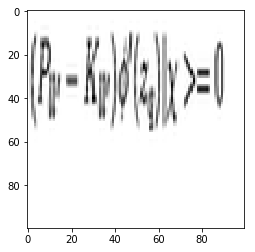

In [46]:
"""Reading in pre-processed images"""

###Pre- Processing carried out by using preprocess_images.py written by the authors of the IM2LATEX
PATH1 = "C:/Users/z003tp7e/Desktop/p"
PATH2= "C:/Users/z003tp7e/Desktop/im2latex_data/im2latex_formulas.lst"

images = {} #dictionary mapping from- name of image: image matrix


for i,filename in enumerate(os.listdir(PATH1)):
    if (i<100):
        
        img = Image.open("C:/Users/z003tp7e/Desktop/p/" + filename) ##0 param reads the image as gray-scale--> IMREAD(F, 0)
        #if img is not None:
        ###reshape images to size(800, 800, 3), the max width and height for train,test, and val is 800

        size= 100, 100               ##MOST IMAGES ARE UNDER THIS SIZE...REDUCE/INCREASE THIS IF NECESSARY
        img = img.resize(size, Image.ANTIALIAS)

        images[filename]= img

labels= open(PATH2, newline="\n").readlines()

print("The first image is: \n")
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(images['100009e256.png'])


In [47]:
"""TEMP LABELS FOR 100 IMAGES"""  ###remove when using full data
lab_1k= labels[0:50]

dat_short=[]
for k, v in images.items():

        dat_short.append(np.array(images[k]))
        
dat_short=np.array(dat_short).reshape((100,3,size[0], size[1]))

In [48]:
"""SEGMENTING DATA BY IDS FOR TRAIN, TEST AND VALIDATION"""

PATH3= "C:/Users/z003tp7e/Desktop/im2latex_data/"
train= open(PATH3 + "/" + "im2latex_train.lst").readlines()
test= open(PATH3 + "/" + "im2latex_test.lst").readlines()
val= open(PATH3 + "/" + "im2latex_validate.lst").readlines()

###images (input) ids corresponding to each id in train, test, and val data
train_ids= [l.split(" ")[1] for l in train]
test_ids= [l.split(" ")[1] for l in test]
val_ids= [l.split(" ")[1] for l in val]

X_train= [images[(tid + ".png")] for tid in train_ids]
X_test= [images[(tid + ".png")] for tid in test_ids]
X_val= [images[(tid + ".png")] for tid in val_ids]

###labels ids corresponding to each image in the train, test and val data

train_ids= [l.split(" ")[0] for l in train]
test_ids= [l.split(" ")[0] for l in test]
val_ids= [l.split(" ")[0] for l in val]

###split labels corresponding to ids in train, val and test

y_train= [labels[int(i)] for i in train_ids]
y_test= [labels[int(i)] for i in test_ids]
y_val= [labels[int(i)] for i in val_ids]

KeyError: '60ee748793.png'

In [ ]:
"""Use latex vocabulary and create char_to_idx, idx_to_char dictionaries"""
PATH3= "C:/Users/z003tp7e/Desktop/im2latex_data/"
PATH4= "C:/Users/z003tp7e.AD001/Downloads/im2latex-tensorflow-master/im2markup"
PATH5= "C:/Users/z003tp7e.AD001/Desktop/im2latex_data"

vocab = open(PATH4 +"/latex_vocab.txt").readlines()
formulae = open(PATH4 +"/formulas.norm.lst",'r').readlines()
char_to_idx = {x.split('\n')[0]:i for i,x in enumerate(vocab)}
# print len(char_to_idx)

char_to_idx['#UNK'] = len(char_to_idx)
char_to_idx['#START'] = len(char_to_idx)
char_to_idx['#END'] = len(char_to_idx)
idx_to_char = {y:x for x,y in char_to_idx.items()}

print ("The number of latex chars are:", len(vocab))
#len(vocab)

In [ ]:
"""Coverting formulae to Sequences of int"""

def formula_to_indices(formula):
    formula = formula.split(' ')
    res = [0]
    for token in formula:
        if token in char_to_idx:
            res.append( char_to_idx[token] + 3 )
        else:
            res.append(2)
    res.append(1)
    return res

formulas = list(map( formula_to_indices, formulae))
#lab_50= ([np.array(l) for l in (list(formulas)[0:50])])


In [ ]:
###zero-pad the formulas
lab50=formulas[0:100]
maxlen= max(len(lab50[i]) for i in range(len(lab50)))

from keras.preprocessing.sequence import pad_sequences
lab_0_padded= pad_sequences(lab50, maxlen)
#lab_0_padded= lab_0_padded.reshape(lab_0_padded.shape[0], lab_0_padded.shape[1], 1)
print(lab_0_padded.shape)

lab_one_hot= np_utils.to_categorical(np.array(lab_0_padded))
lab_one_hot=lab_one_hot.reshape(lab_0_padded.shape[0], lab_0_padded.shape[1], lab_one_hot.shape[1])

In [ ]:
def encoder_decoder(out_dim,attention= True):
    
    model.add(LSTM(out_dim, activation= 'relu', return_sequences=True) ) ##output_dim is the dimension of the output of enc
    # with a Sequential model
    get_3rd_layer_output = K.function([model.layers[0].input],[model.layers[3].output])
    layer_output = get_3rd_layer_output([x])[0]  ##is v~ matrix in the paper...
              
    if attention:
              pass
              

In [ ]:
"""BUILDING THE NNET...
   i/p--> CNN layers--> ENCODER --> ATTENTION --> DECODER"""

model= Sequential()

#CNN PART
filter_no_lastlayer= 10                                                                                 #should be 512
model.add(Conv2D(60, (3,3), input_shape=(3,size[0], size[1]), padding= "same", activation="relu", use_bias=True)) #64 , TRY TO REDUCE SIZE OF IMAGES BY NOT INCLUSING PADDING
#model.add(Conv2D(12, (3,3), padding= "same", activation="relu", use_bias=True))                          #128
#model.add(Conv2D(256, (3,3), padding= "same", activation="relu", use_bias=True))                          #256
#model.add(Conv2D(256, (3,3), padding= "same", activation="relu", use_bias=True))                          #256
#model.add(MaxPooling2D(pool_size=(2,1), data_format= "channels_first"))                                   #mp(2,1)
#model.add(Conv2D(512, (3,3), padding= "same", activation="relu", use_bias=True))                          #512
#model.add(MaxPooling2D(pool_size=(1,2), data_format= "channels_first"))                                   #mp(1,2)
model.add(Conv2D(filter_no_lastlayer, (3,3), padding= "same", activation="relu", use_bias=True)) ##produces 512 2-d feature maps--> each enc vec is 512 dimensional
#print(model.layers)

# last_cnn_output = K.function([model.layers[0].input],[model.layers[1].output])
# encoder_mat = last_cnn_output([dat_short])[0]  ##is v~ matrix in the paper...
# print(encoder_mat.shape)

#x is the data to get output on: x=data

#beam-search
cnn_out= model.predict(dat_short)
print("The shape of the matrix of the last CNN Layer is:", cnn_out.shape)



In [ ]:
"""SEQ2SEQ MODEL"""

#params
cnn_out=cnn_out.reshape(100, size[0]*size[1],10)
xtr= cnn_out[0:90]
ytr= lab_one_hot[0:90]
xte=cnn_out[90:100]
yte=lab_one_hot[90:100]
hid_dim=10
depth= 2 ##no of LSTM layers in seq2seq

model_s2s= Sequential()
model_s2s = AttentionSeq2Seq(input_dim=filter_no_lastlayer, input_length=size[0]*size[1], hidden_dim=hid_dim, output_length=maxlen, output_dim=lab_one_hot.shape[2], depth=depth)
model_s2s.compile(loss='categorical_crossentropy', optimizer='rmsprop')

#model_s2s.fit(cnn_out, lab50)

In [ ]:
model_s2s.fit(xtr, ytr)
#pred= model.predict(xte, yte)

In [ ]:
pred= model_s2s.predict(xte)

In [ ]:
pred.shape
idx= np.argmax(pred[2], axis=1)

res_1= [idx_to_char[idx[i]] for i in range(len(idx))]


In [ ]:
np.argmax(pred[3], axis=1)
res_1

In [ ]:
images['100da50051.png']

In [ ]:
# variation to https://github.com/ryankiros/skip-thoughts/blob/master/decoding/search.py
 
def keras_rnn_predict(samples, empty=empty, rnn_model=model, maxlen=maxlen):
    """for every sample, calculate probability for every possible label
    you need to supply your RNN model and maxlen - the length of sequences it can handle
    """
    data = sequence.pad_sequences(samples, maxlen=maxlen, value=empty)
    return rnn_model.predict(data, verbose=0)
 
def beamsearch(predict=keras_rnn_predict,
               k=1, maxsample=400, use_unk=False, oov=oov, empty=empty, eos=eos):
    """return k samples (beams) and their NLL scores, each sample is a sequence of labels,
    all samples starts with an `empty` label and end with `eos` or truncated to length of `maxsample`.
    You need to supply `predict` which returns the label probability of each sample.
    `use_unk` allow usage of `oov` (out-of-vocabulary) label in samples
    """
     
    dead_k = 0 # samples that reached eos
    dead_samples = []
    dead_scores = []
    live_k = 1 # samples that did not yet reached eos
    live_samples = [[empty]]
    live_scores = [0]
 
    while live_k and dead_k < k:
        # for every possible live sample calc prob for every possible label 
        probs = predict(live_samples, empty=empty)
 
        # total score for every sample is sum of -log of word prb
        cand_scores = np.array(live_scores)[:,None] - np.log(probs)
        if not use_unk and oov is not None:
            cand_scores[:,oov] = 1e20
        cand_flat = cand_scores.flatten()
 
        # find the best (lowest) scores we have from all possible samples and new words
        ranks_flat = cand_flat.argsort()[:(k-dead_k)]
        live_scores = cand_flat[ranks_flat]
 
        # append the new words to their appropriate live sample
        voc_size = probs.shape[1]
        live_samples = [live_samples[r//voc_size]+[r%voc_size] for r in ranks_flat]
 
        # live samples that should be dead are...
        zombie = [s[-1] == eos or len(s) >= maxsample for s in live_samples]
         
        # add zombies to the dead
        dead_samples += [s for s,z in zip(live_samples,zombie) if z]  # remove first label == empty
        dead_scores += [s for s,z in zip(live_scores,zombie) if z]
        dead_k = len(dead_samples)
        # remove zombies from the living 
        live_samples = [s for s,z in zip(live_samples,zombie) if not z]
        live_scores = [s for s,z in zip(live_scores,zombie) if not z]
        live_k = len(live_samples)
 
    return dead_samples + live_samples, dead_scores + live_scores 

In [16]:
import tensorflow as tf
from tensorflow.contrib.rnn import BasicLSTMCell
cell= tf.contrib.rnn.AttentionWrapper(BasicLSTMCell(512))

AttributeError: module 'tensorflow.contrib.rnn' has no attribute 'AttentionWrapper'

'1.2.1'